In [1]:
from sympy import *
import numpy as np
import pandas as pd

from direct_lingam.simulate_data import get_Lambda, simulate_data
from direct_lingam.DAG import plot_dag
import pyximport; pyximport.install(inplace=True)
import multiprocess as mp
from models import ICM

Lambda is 
 [[0 0 0]
 [1 0 0]
 [0 1 0]]


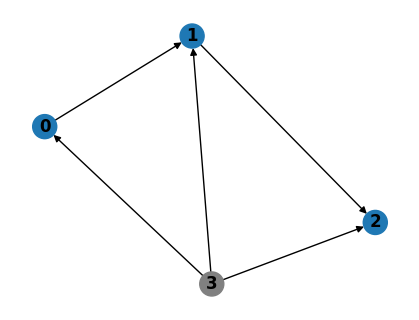

In [2]:
Lambda = get_Lambda([(1,0), (2, 1)], 3)
print(f"Lambda is \n {Lambda}")
Gamma = np.array([[1], [1], [1]])
highest_l = 1
plot_dag(np.hstack((Lambda, Gamma))) # Latent nodes are grey

In [3]:
reps = 20

def run_experiment(seed):
    # run the experiment using the given parameters
    # Set the random seed
    noise_distribution = 'gamma'
    samples_sizes = [10**n for n in range(1, 8)]
    n_max = int(max(samples_sizes))
    # p, q = Lambda.shape[0], Lambda.shape[1]+Gamma.shape[1]
    np.random.seed(seed)
    X, true_B = simulate_data(n_max, noise_distribution=noise_distribution, Lambda=Lambda, Gamma=Gamma, permute_order=False)
    causal_effect_true = true_B[2, 1]

    # Perform the experiment
    causal_effect_estimate = []

    for n in samples_sizes:
        X_sample = X[:int(n), :]
        X_sample = np.asfortranarray(X_sample)
        X_sample = X_sample - np.mean(X_sample, axis=0)

        model = ICM(X_sample, highest_l=highest_l)
        causal_effect_estimate.append(model.estimate_effect())

    # Create a DataFrame for the current seed
    seed_df = pd.DataFrame({
        'Seed': [seed] * len(samples_sizes),
        'Sample Size': samples_sizes,
        'True Effect': [causal_effect_true] * len(samples_sizes),
        'Effect Estimate': causal_effect_estimate,
    })
    return seed_df

def parallel_simulation(reps):
    pool = mp.Pool(mp.cpu_count())

    seeds = range(reps)
    results = pool.map(run_experiment, seeds)

    pool.close()
    return pd.concat(results, ignore_index=True)

results_df = parallel_simulation(reps)

estmating effect


/Users/daniele/Library/CloudStorage/OneDrive-TUM/Math/generilized_did/generilized_did/models.py:67: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.polynomial.Polynomial(estimated_coeffs[::-1]).roots().astype(np.float64)


estmating effect
estmating effect


/Users/daniele/Library/CloudStorage/OneDrive-TUM/Math/generilized_did/generilized_did/models.py:67: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.polynomial.Polynomial(estimated_coeffs[::-1]).roots().astype(np.float64)
/Users/daniele/Library/CloudStorage/OneDrive-TUM/Math/generilized_did/generilized_did/models.py:67: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.polynomial.Polynomial(estimated_coeffs[::-1]).roots().astype(np.float64)


estmating effect
estmating effect
estmating effect

/Users/daniele/Library/CloudStorage/OneDrive-TUM/Math/generilized_did/generilized_did/models.py:67: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.polynomial.Polynomial(estimated_coeffs[::-1]).roots().astype(np.float64)



estmating effect


/Users/daniele/Library/CloudStorage/OneDrive-TUM/Math/generilized_did/generilized_did/models.py:67: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.polynomial.Polynomial(estimated_coeffs[::-1]).roots().astype(np.float64)


estmating effect
estmating effect
estmating effect
estmating effect
estmating effect


/Users/daniele/Library/CloudStorage/OneDrive-TUM/Math/generilized_did/generilized_did/models.py:67: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.polynomial.Polynomial(estimated_coeffs[::-1]).roots().astype(np.float64)


estmating effect
estmating effect
estmating effect


/Users/daniele/Library/CloudStorage/OneDrive-TUM/Math/generilized_did/generilized_did/models.py:67: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.polynomial.Polynomial(estimated_coeffs[::-1]).roots().astype(np.float64)


estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effectestmating effect

estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effectestmating effect

estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect


/Users/daniele/Library/CloudStorage/OneDrive-TUM/Math/generilized_did/generilized_did/models.py:67: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.polynomial.Polynomial(estimated_coeffs[::-1]).roots().astype(np.float64)


estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effectestmating effect

estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effect
estmating effe

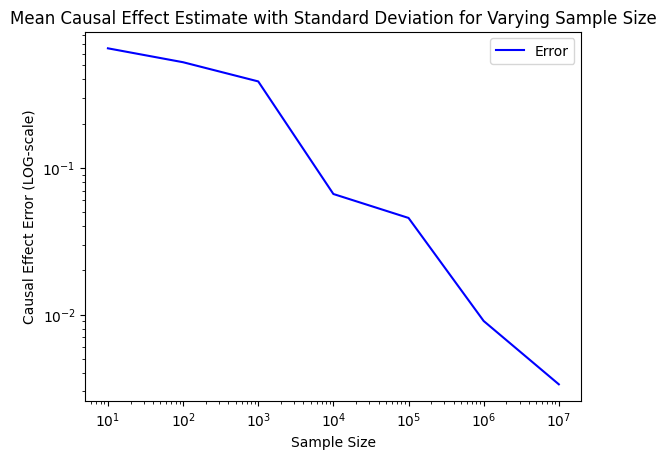

In [4]:
import matplotlib.pyplot as plt

results_df["Error"] = np.abs((results_df['Effect Estimate'] - results_df["True Effect"])/results_df["True Effect"])  # Calculate the error


# Group the results by sample size and calculate the mean
mean_results = results_df.groupby('Sample Size').median()
mean_sd = results_df.groupby('Sample Size').std()

# Plot the mean results
plt.yscale('log')
plt.xscale('log')
plt.plot(mean_results.index, mean_results["Error"],
         label='Error',
         color = "blue")



plt.xlabel('Sample Size')
plt.ylabel('Causal Effect Error (LOG-scale)')
plt.legend()
plt.title('Mean Causal Effect Estimate with Standard Deviation for Varying Sample Size')
plt.show()

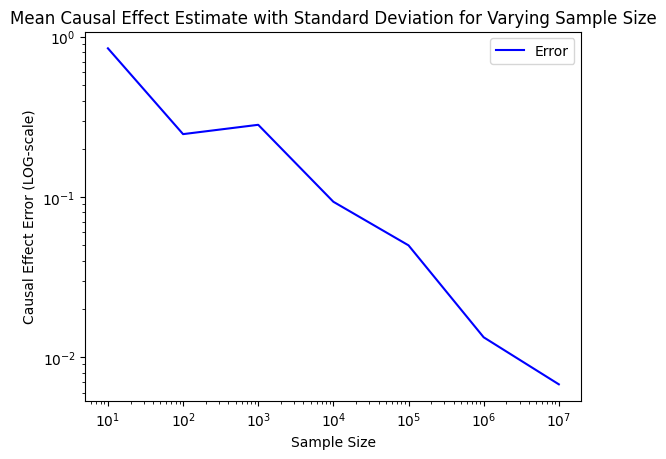

In [5]:
import matplotlib.pyplot as plt

results_df["Error"] = np.abs((results_df['Effect Estimate'] - results_df["True Effect"])/results_df["True Effect"])  # Calculate the error


# Group the results by sample size and calculate the mean
mean_results = results_df.groupby('Sample Size').median()
mean_sd = results_df.groupby('Sample Size').std()

# Plot the mean results
plt.yscale('log')
plt.xscale('log')
plt.plot(mean_results.index, mean_results["Error"],
         label='Error',
         color = "blue")



plt.xlabel('Sample Size')
plt.ylabel('Causal Effect Error (LOG-scale)')
plt.legend()
plt.title('Mean Causal Effect Estimate with Standard Deviation for Varying Sample Size')
plt.show()